In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def analysis():
    event = pd.read_csv('./data/event_interview.csv')
    outcome = pd.read_csv('./data/outcome_interview.csv')
    fighter = pd.read_csv('./data/fighter_interview.csv')


    usefull_columns = ['fighter1_name',
                       'fighter2_name',
                       'fighter1_nationality',
                       'fighter2_nationality',
                       'event_name']
    new_columns={'id':'event_id','name':'event_name'}

    fighter_id = ['fighter1','fighter2']
    fighter_value =['name','nationality']




    for fighters in fighter_id:
        for fid in outcome[fighters+'_id']:
            for value in fighter_value:
                outcome.loc[outcome[fighters+'_id']==int(fid),str(fighters)+'_'+str(value)]=fighter.loc[fighter.id==int(fid)][value].values[0]

    final_df= event.rename(columns=new_columns).merge(outcome, on =['event_id'], how = 'inner')[usefull_columns]
    final_df.to_csv('./final_result.csv')
    print(final_df.head())
    return final_df

def visualisation(n_min_fighter):
    fighter = pd.read_csv('./data/fighter_interview.csv')
    new_df = pd.DataFrame(index = None)
    nationality = []
    number_of_fighter = []
    for nations in fighter.nationality.unique():
        nationality.append(nations)
        number_of_fighter.append(len(fighter.loc[fighter.nationality==nations]))
    new_df['nationality'] = nationality
    new_df['number_of_fighter'] = number_of_fighter
    new_df.loc[new_df.nationality=='United States','number_of_fighter']=new_df.loc[new_df.nationality=='United States']['number_of_fighter'].values[0]+new_df.loc[new_df.nationality=='USA']['number_of_fighter'].values[0]
    new_df = new_df[new_df.nationality!='USA']
    new_df = new_df.sort_values(by='number_of_fighter',ascending=False)
    new_df = new_df.loc[new_df.number_of_fighter>=n_min_fighter]



    plt.figure(figsize=(16,8))
    plt.bar(new_df.nationality,height = new_df.number_of_fighter,color = ['red','green','black','blue','cyan'])
    plt.grid()
    plt.title('Distrubtion of number of fighters, minimum number of fighters :'+str(n_min_fighter))
    plt.show(True)
    print('\n\n')
    
    fig1, ax1 = plt.subplots(figsize=(16,8))
    labels = new_df.nationality
    plt.pie(new_df.number_of_fighter, labels=labels,autopct='%1.1f%%')
    ax1.axis('equal')
    plt.title('Distrubtion of number of fighters, minimum number of fighters :'+str(n_min_fighter))
    plt.show(True)


   fighter1_name  fighter2_name fighter1_nationality fighter2_nationality  \
0       Ed Cline    JC Cottrell        United States        United States   
1   Myron Dennis     Ryan Spann        United States        United States   
2   Daryl Wilson  Robert Watley        United States        United States   
3  Marat Gafurov     Rob Lisita               Russia            Australia   
4   Edward Kelly        Ev Ting          Philippines          New Zealand   

                          event_name  
0  Legacy FC 45: Todhunter vs. Smith  
1          LFA 27: Watley vs. Wilson  
2          LFA 27: Watley vs. Wilson  
3          ONE FC 21: Roar of Tigers  
4          ONE FC 21: Roar of Tigers  


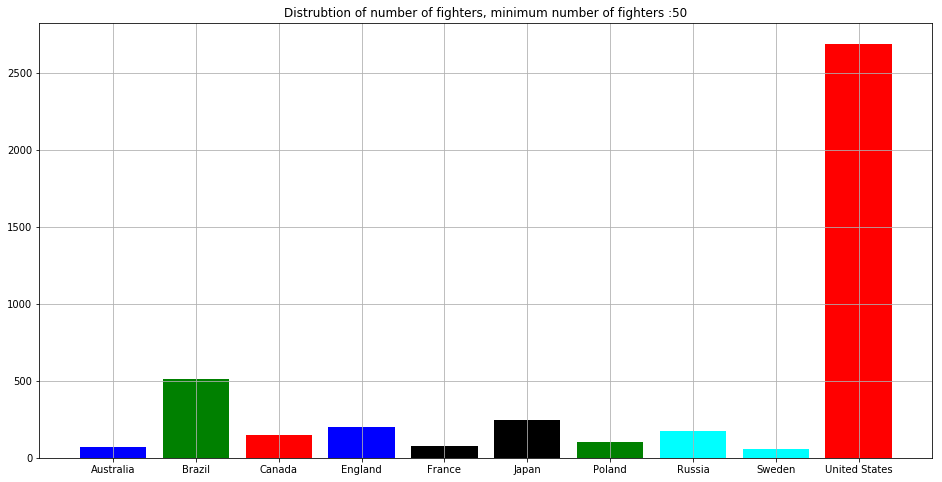

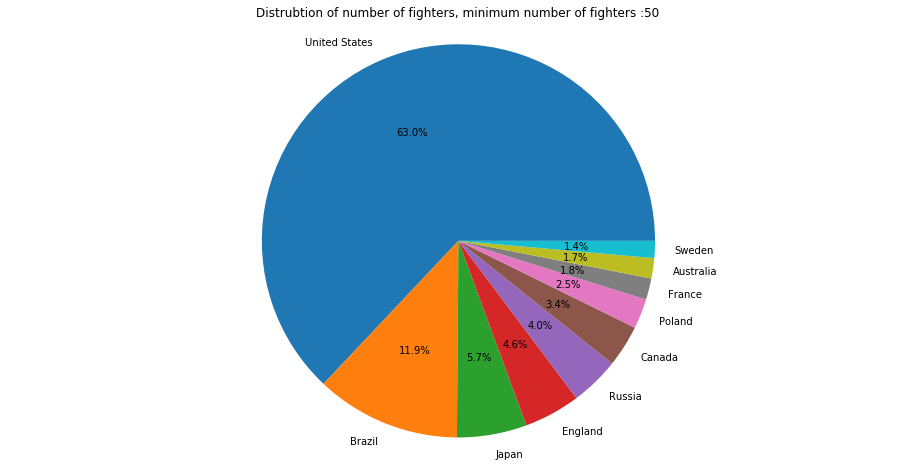

In [3]:
if __name__=="__main__":
    analysis()
    visualisation(n_min_fighter=50)